### Loading Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing

In [4]:
df.drop(["Name","Ticket","Fare"],axis="columns",inplace=True)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop("Cabin",axis="columns",inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [8]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

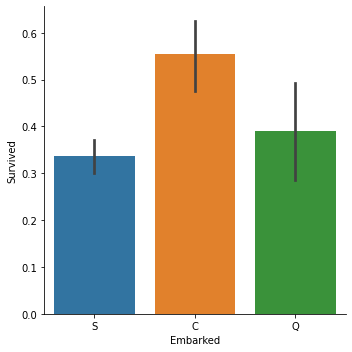

In [10]:
sns.catplot(x="Embarked",y="Survived",data=df,kind="bar")

In [11]:
import numpy as np

In [12]:
df["Embarked"].replace(np.nan,"A",inplace=True)

In [13]:
df["Embarked"].unique()

array(['S', 'C', 'Q', 'A'], dtype=object)

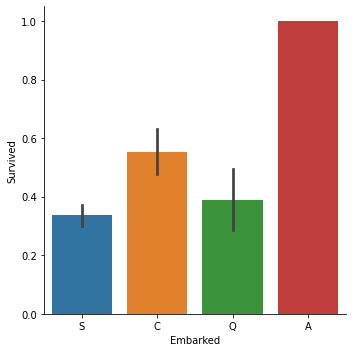

In [14]:
sns.catplot(x="Embarked",y="Survived",data=df,kind="bar")

In [15]:
mean_age=df["Age"].mean()
mean_age

29.69911764705882

In [16]:
df["Age"]=df["Age"].fillna(mean_age)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [18]:
final=df.drop(["PassengerId","Survived"],axis="columns")
final.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [19]:
du_sex=pd.get_dummies(final["Sex"])

In [20]:
du_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
du_sex.drop("male",axis="columns",inplace=True)

In [22]:
final=pd.concat([final,du_sex],axis="columns")

In [23]:
final.drop("Sex",axis="columns",inplace=True)

In [24]:
final.head()

,Pclass,Age,SibSp,Parch,Embarked,female
0,3,22.0,1,0,S,0
1,1,38.0,1,0,C,1
2,3,26.0,0,0,S,1
3,1,35.0,1,0,S,1
4,3,35.0,0,0,S,0


In [25]:
du_embarked=pd.get_dummies(final["Embarked"])

In [26]:
du_embarked.head()

,A,C,Q,S
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [27]:
du_embarked.drop("A",axis="columns",inplace=True)

In [28]:
final=pd.concat([final,du_embarked],axis="columns")

In [29]:
final.drop("Embarked",axis="columns",inplace=True)

In [30]:
final.head()

,Pclass,Age,SibSp,Parch,female,C,Q,S
0,3,22.0,1,0,0,0,0,1
1,1,38.0,1,0,1,1,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,0,0,1


In [31]:
x=final
x.shape

(891, 8)

In [32]:
y=df["Survived"]
y.shape

(891,)

#### Now to find the best one we need to do Hyper Tunning by GridSearchCV

### Hyperparameter Tuning & Cross Validation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(LogisticRegression(),x,y)

C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

array([0.79329609, 0.78651685, 0.79213483, 0.76404494, 0.8258427 ])

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [38]:
model_params={
    'LogisticRegression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20],
            'penalty':['l1','l2']
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy']
        }
    },
    'random_forest_classifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,10,20]
        }
    },
    'SVC':{
        'model':SVC(),
        'params':{
            'kernel':['linear', 'rbf'],
            'C':[1,5,10]
        }
    }
}

In [39]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [40]:
scores_df=pd.DataFrame(scores,columns=["model","best_score","best_params"])
scores_df

,model,best_score,best_params
0,LogisticRegression,0.792367,"{'C': 1, 'penalty': 'l2'}"
1,DecisionTreeClassifier,0.793541,{'criterion': 'entropy'}
2,random_forest_classifier,0.797991,{'n_estimators': 10}
3,SVC,0.810320,"{'C': 10, 'kernel': 'rbf'}"


### Model Training

### So we see SVC have batter results

In [52]:
model=SVC(C=10,kernel='rbf')
model.fit(x,y)

SVC(C=10)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [55]:
x_train.shape

(668, 8)

In [56]:
x_test.shape

(223, 8)

In [57]:
y_predict=model.predict(x_test)

In [68]:
model.score(x_test,y_test)

0.8251121076233184

In [60]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       143
           1       0.77      0.72      0.75        80

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[126  17]
 [ 22  58]]
